ロジスティック回帰をフルスクラッチで実装する in Python
>参考URL:
https://enjoyworks.jp/tech-blog/3087

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from pandas.plotting import scatter_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics
%matplotlib inline

In [2]:
#サイキットラーンからデータの読み込み
from sklearn import datasets

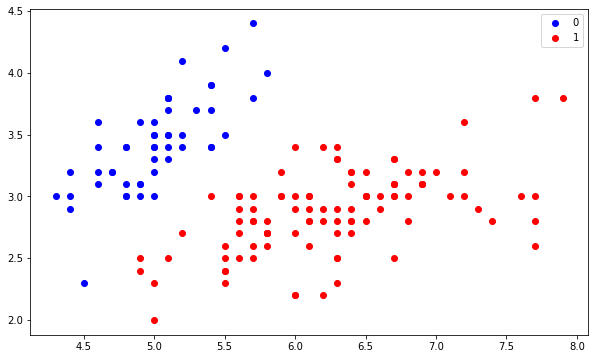

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0) * 1
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend();

In [4]:
print(X)
print(y)

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

In [5]:
def sigmoid(z):
    #シグモイド関数
    z = np.dot(X, theta)
    sigmoid_func = 1 / (1 + np.exp(-z))
    return sigmoid_func

データの分割：
---

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

損失関数の実装：
---

In [31]:
def loss(h, y):
    loss_func = (-y*np.log(h)-(1-y)*np.log(1-h)).mean()
    return loss_func

In [32]:
#勾配降下によるパラメーターの調整
def gradient():
    gradient = np.dot(X.T, (h - y))/y.shape[0]

In [33]:
#予測
def predict_probs(X, theta):
    return sigmoid(np.dot(X, theta))

def predict(X, theta, threshod=0.5):
    return predict_probs(X, theta)>=threshold

【問題4】目的関数
----
>以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。
なお、この数式には正則化項が含まれています。

J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j.\\

今までのクラスをコードにまとめる：
---

In [203]:
class scrach_logisticRegression():
    def __init__(self, lr=0.01, num_iter=1000, fit_intercept=True, verbose=False, lamda=0.01):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.lamda=lamda
        self.verbose = verbose
        self.loss = np.empty(0)
        self.val_loss = []
        
    def __add__intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis = 1)
    
    def __add__intercept_val_loss(self, val_X):
        intercept = np.ones((val_X.shape[0], 1))
        return np.concatenate((intercept, val_X), axis = 1)
    
    def __sigmoid(self, z): 
        sigmoid_func = 1 / (1 + np.exp(-z))#ロジスティック回帰の仮定関数 Zはarray([0., 0.])今回の場合は３列で出力される
        return sigmoid_func
    
    def __loss(self, h, y):
        #保持するリストを作る。
        loss_func = (-y*np.log(h)-(1-y)*np.log(1-h)).mean()+(self.lamda*np.sum(self.theta**2)/(2*X.shape[0]))#ロジスティックの損失関数
        return loss_func
    
    def __val_loss(self, h, y):
        #保持するリストを作る。
        
        loss_func = (-y*np.log(h)-(1-y)*np.log(1-h)).mean()+(self.lamda*np.sum(self.theta**2)/(2*X.shape[0]))#ロジスティックの損失関数
        return loss_func
    
    def fit(self, X, y, val_X, val_y):
        if self.fit_intercept:
            X = self.__add__intercept(X) #切片計算のための３列の行列の作成
            val_X = self.__add__intercept_val_loss(val_X)
        #weight initialization
        self.theta = np.zeros(X.shape[1]) #array([0., 0.])を生成
    
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
#             print(z)
            h = self.__sigmoid(z)
#             print(h)
            gradient = np.dot(X.T, (h - y))/y.size #.sizeはオブジェクトの個数を返す
#             print(gradient.shape)
            self.theta -= self.lr*gradient
            
            #損失関数の計算_loss
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            self.loss = np.append(self.loss, self.__loss(h, y))
            print('Self.loss')
            print(self.loss)
            
            #損失関数の計算_val_loss
            z = np.dot(val_X, self.theta)
            h = self.__sigmoid(z)
            self.val_loss.append(self.__val_loss(h, val_y))
#             print('Self.val_loss')
#             print(self.val_loss)
            
        return self.loss, self.val_loss
            
            
    def predict_prob(self, X):
            if self.fit_intercept:
                X = self.__add__intercept(X)
                
            return self.__sigmoid(np.dot(X, self.theta))
        
    def predict(self, X):
        return self.predict_prob(X).round()

評価の実施：
---

In [204]:
model = scrach_logisticRegression(lr=0.1, num_iter=500)
loss_list, val_loss_list = model.fit(X_train, y_train, X_test, y_test)

Self.loss
[0.5853818]
Self.loss
[0.5853818 0.580614 ]
Self.loss
[0.5853818  0.580614   0.57602746]
Self.loss
[0.5853818  0.580614   0.57602746 0.57149957]
Self.loss
[0.5853818  0.580614   0.57602746 0.57149957 0.56702793]
Self.loss
[0.5853818  0.580614   0.57602746 0.57149957 0.56702793 0.56261193]
Self.loss
[0.5853818  0.580614   0.57602746 0.57149957 0.56702793 0.56261193
 0.55825097]
Self.loss
[0.5853818  0.580614   0.57602746 0.57149957 0.56702793 0.56261193
 0.55825097 0.55394446]
Self.loss
[0.5853818  0.580614   0.57602746 0.57149957 0.56702793 0.56261193
 0.55825097 0.55394446 0.5496918 ]
Self.loss
[0.5853818  0.580614   0.57602746 0.57149957 0.56702793 0.56261193
 0.55825097 0.55394446 0.5496918  0.54549239]
Self.loss
[0.5853818  0.580614   0.57602746 0.57149957 0.56702793 0.56261193
 0.55825097 0.55394446 0.5496918  0.54549239 0.54134562]
Self.loss
[0.5853818  0.580614   0.57602746 0.57149957 0.56702793 0.56261193
 0.55825097 0.55394446 0.5496918  0.54549239 0.54134562 0.53725

In [205]:
y_pred_scratch = model.predict(X_test)

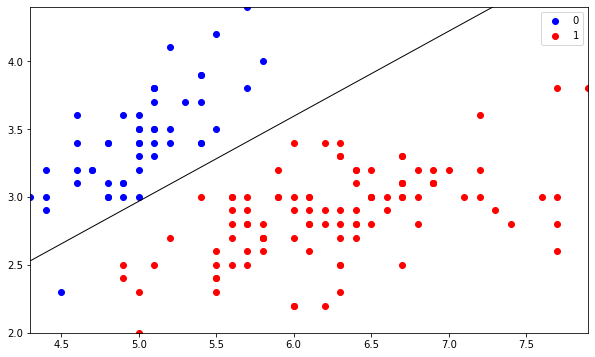

In [206]:
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='b', label='0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='r', label='1')
plt.legend()
x1_min, x1_max = X_train[:,0].min(), X_train[:,0].max(),
x2_min, x2_max = X_train[:,1].min(), X_train[:,1].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
grid = np.c_[xx1.ravel(), xx2.ravel()]
probs = model.predict_prob(grid).reshape(xx1.shape)
plt.contour(xx1, xx2, probs, [0.5], linewidths=1, colors='black');

In [207]:
# print(loss_list)
# print(val_loss_list)

In [208]:
print(model.theta)

[-0.57491788  2.21963378 -3.54621048]


In [209]:
print('MESは{}'.format(mean_squared_error(y_test, y_pred_scratch)))
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, y_pred_scratch)))

MESは0.0
Accuracy: 1.0


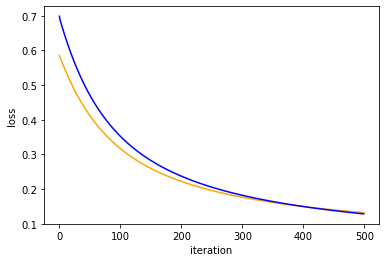

In [210]:
plt.plot(loss_list, color='orange')
plt.plot(val_loss_list, color='blue')
plt.ylabel("loss")
plt.xlabel("iteration")
plt.show()

In [211]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred_scratch))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred_scratch))
print('precision = ', precision_score(y_true=Y_test, y_pred=y_pred_scratch))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred_scratch))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred_scratch))

confusion matrix = 
 [[16  0]
 [ 0 22]]
accuracy =  1.0
precision =  0.6363636363636364
recall =  1.0
f1 score =  1.0


Sklearnを用いたロジスティック回帰分析
---

In [162]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

print("coefficient = ", lr.coef_)
print("intercept = ", lr.intercept_)

coefficient =  [[ 3.19934089 -2.64507719]]
intercept =  [-8.71915337]


In [163]:
y_pred = lr.predict(X_test)

In [164]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print('confusion matrix = \n', confusion_matrix(y_true=y_test, y_pred=y_pred))
print('accuracy = ', accuracy_score(y_true=y_test, y_pred=y_pred))
print('precision = ', precision_score(y_true=Y_test, y_pred=y_pred))
print('recall = ', recall_score(y_true=y_test, y_pred=y_pred))
print('f1 score = ', f1_score(y_true=y_test, y_pred=y_pred))

confusion matrix = 
 [[16  0]
 [ 0 22]]
accuracy =  1.0
precision =  0.6363636363636364
recall =  1.0
f1 score =  1.0
